In [119]:
import pandas as pd
import numpy as np
import re
import spacy
import spacy.cli
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [29]:
spacy.cli.download("en_core_web_sm")
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [30]:
nlp_en_sm = spacy.load("en_core_web_sm")
nlp_en_md = spacy.load("en_core_web_md")

# 1. Dataset

In [10]:
dataset=pd.read_csv('tweets.csv', encoding='latin-1', header=0)

In [11]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
dataset=dataset.iloc[:, [2,4,5]]

In [13]:
dataset.head()

,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [14]:
dataset.set_axis(['date', 'user', 'tweet'], axis=1, inplace=True)

In [15]:
dataset.head()

,date,user,tweet
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


# 2. Usuarios populares

In [19]:
def getUser(tweet):
    regex=r"@[a-zA-Z0-9]+\s"
    try:
        match=re.findall(regex, tweet)
        match=match[0].replace(' ', '')
    except:
        pass
    return match

In [21]:
users=dataset['tweet'].apply(getUser).dropna()


In [22]:
users.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                943463
@mileycyrus         4142
@tommcfly           3736
@ddlovato           3166
@Jonasbrothers      1209
                   ...  
@iralu1                1
@lenahimechan          1
@Suicidalbunny         1
@furiousball           1
@oxhot                 1
Name: tweet, Length: 300821, dtype: int64

#### Corpus @mileycyrus

In [23]:
mileycyrusCorpus=dataset[dataset['tweet'].str.contains("@mileycyrus")]
mileycyrusCorpus.head()

,date,user,tweet
1020,Mon Apr 06 23:30:57 PDT 2009,kristenn_lynn,@mileycyrus hahaha dont be like that one time ...
2013,Tue Apr 07 00:45:20 PDT 2009,nathiuria,"@mileycyrus i have the same problem, but it's ..."
2072,Tue Apr 07 00:49:07 PDT 2009,amyamoore,@mileycyrus I guess counting sheep didn't work...
2079,Tue Apr 07 00:49:44 PDT 2009,xdokkenx,@mileycyrus I would too if it meant spending a...
2155,Tue Apr 07 00:56:41 PDT 2009,XFearLessX,@mileycyrus AWWW u seriously have the cutest d...


#### Corpus @tommcfly

In [24]:
tommcflyCorpus=dataset[dataset['tweet'].str.contains("@tommcfly")]
tommcflyCorpus.head()

,date,user,tweet
1689,Tue Apr 07 00:19:09 PDT 2009,mcsteph94,@tommcfly hey saw u guys play @ pushover..didn...
1788,Tue Apr 07 00:26:52 PDT 2009,mcflyholland,@tommcfly Good morning Tom! Why can't I send y...
2513,Tue Apr 07 01:23:07 PDT 2009,ckstarlet,@tommcfly did you know that johnsons baby use ...
3028,Tue Apr 07 02:03:41 PDT 2009,McFLYBelgium,"@dougiemcfly @tommcfly good morning guys, how ..."
3523,Tue Apr 07 02:46:02 PDT 2009,lilmissvik,"@tommcfly hey, no chance of adding brighton or..."


#### Corpus @ddlovato

In [25]:
ddlovatoCorpus=dataset[dataset['tweet'].str.contains("@ddlovato")]
ddlovatoCorpus.head()

,date,user,tweet
459,Mon Apr 06 22:51:34 PDT 2009,toritor11,@ddlovato @David_Henrie ummmmm i cant find it.
572,Mon Apr 06 22:58:30 PDT 2009,lovatolover,@ddlovato Do you hate us?? Please don't
7031,Tue Apr 07 07:02:58 PDT 2009,mariapersson,@ddlovato Wish that i could see it.. Thats th...
7088,Tue Apr 07 07:05:11 PDT 2009,xxBEJEALOUSxx,"@ddlovato hey demi, wen are you and selena gon..."
8610,Fri Apr 17 20:31:31 PDT 2009,Julie_Dances,@ddlovato ahhhh i wish i could go to the dalla...


# 3. Preprocesamiento

#### Normalización de texto

In [26]:
def normalize_text(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚÑ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

In [31]:
mileycyrusCorpusText=normalize_text(mileycyrusCorpus['tweet'])

In [33]:
tommcflyCorpusText=normalize_text(tommcflyCorpus['tweet'])

In [34]:
ddlovatoCorpusText=normalize_text(ddlovatoCorpus['tweet'])

#### Tokenización

In [38]:
def tokenization(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp_en_sm(doc))
    return newCorpus

In [39]:
mileycyrusCorpusToken=tokenization(mileycyrusCorpusText)

In [41]:
tommcflyCorpusToken=tokenization(tommcflyCorpusText)

In [42]:
ddlovatoCorpusToken=tokenization(ddlovatoCorpusText)

#### Stopwords

In [43]:
def removeStops(corpus):
    newCorpus = []
    for doc in corpus:
        s = ''
        for token in doc:
            if(token.is_stop == False):
                s = s + token.text + ' '
        newCorpus.append(s.strip())
    return newCorpus

In [44]:
mileycyrusCorpusStopwords = removeStops(mileycyrusCorpusToken)

In [46]:
tommcflyCorpusStopwords = removeStops(tommcflyCorpusToken)

In [47]:
ddlovatoCorpusStopwords = removeStops(ddlovatoCorpusToken)

#### Stemming y Lemmatization.

In [49]:
def stemming_lemmatization(corpus):
    docs = tokenization(corpus)
    newCorpus = []
    for doc in docs:
        s = ''
        for token in doc:
            s = s + token.lemma_ + ' '
        newCorpus.append(s.strip())
    return newCorpus

In [59]:
mileycyrusCorpusSL = stemming_lemmatization(mileycyrusCorpusStopwords)

In [51]:
tommcflyCorpusSL = stemming_lemmatization(tommcflyCorpusStopwords)

In [52]:
ddlovatoCorpusSL = stemming_lemmatization(ddlovatoCorpusStopwords)

In [54]:
def corpus2String(corpus):
    strX = ''
    for doc in corpus:
        strX = strX + doc + ' '
    return strX

In [75]:
mileycyrusCorpusSL2 = corpus2String(mileycyrusCorpusSL)
tommcflyCorpusSL2 = corpus2String(tommcflyCorpusSL)
ddlovatoCorpusSL2 = corpus2String(ddlovatoCorpusSL)

In [76]:
mileycyrusCorpusSL2 = mileycyrusCorpusSL2.strip().split(' ')
tommcflyCorpusSL2 = tommcflyCorpusSL2.strip().split(' ')
ddlovatoCorpusSL2 = ddlovatoCorpusSL2.strip().split(' ')

In [77]:
mileycyrusCorpusSL3 = set(mileycyrusCorpusSL2)
tommcflyCorpusSL3 = set(tommcflyCorpusSL2)
ddlovatoCorpusSL3 = set(ddlovatoCorpusSL2)

In [63]:
ncol = len(mileycyrusCorpusSL3)
nrow = len(mileycyrusCorpusSL)
nrow, ncol

(4491, 4974)

In [64]:
def generateEmptyMatrix(cols, rows):
    outDf = pd.DataFrame(index=rows, columns=cols)
    outDf.fillna(0, inplace=True)
    return outDf

In [78]:
cols = list(mileycyrusCorpusSL3)
rows = range(0, len(mileycyrusCorpusSL))

colstommcflyCorpusSL = list(tommcflyCorpusSL3)
rowstommcflyCorpusSL = range(0, len(tommcflyCorpusSL))

colsddlovatoCorpusSL = list(ddlovatoCorpusSL3)
rowsddlovatoCorpusSL = range(0, len(ddlovatoCorpusSL))

In [79]:
tfMatrix = generateEmptyMatrix(cols, rows)
tfMatrixtommcflyCorpusSL = generateEmptyMatrix(colstommcflyCorpusSL, rowstommcflyCorpusSL)
tfMatrixddlovatoCorpusSL = generateEmptyMatrix(colsddlovatoCorpusSL, rowsddlovatoCorpusSL)


In [71]:
def calculoTf(corpus, df):
    corpus = tokenization(corpus)
    for index, doc in enumerate(corpus):
        docSize = len(doc)
        for token in doc:
            try:
                colIndex = list(df.columns).index(token.text)
                df.iloc[index, colIndex] = df.iloc[index, colIndex] + 1
            except:
                pass
        df.iloc[index, :] = df.iloc[index, :] / docSize
    return df

#### BOW mileycyrusCorpusSL

In [72]:
tfMatrix = calculoTf(mileycyrusCorpusSL, tfMatrix)

In [74]:
tfMatrix.to_csv("mileycyrusCorpusSL_Matrix.csv", index=False)

#### BOW tommcflyCorpusSL

In [85]:
tfMatrixtommcflyCorpusSL.head()

,,stay,foodhaha,test,asap,venezuela,mrtwiiter,nibble,internet,look,...,light,ono,meaaannn,campus,itand,becoz,window,3s,duda,vary
0,0,0.0,0,0.000000,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.000000,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.090909,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.000000,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.000000,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
tfMatrixtommcflyCorpusSL = calculoTf(tommcflyCorpusSL, tfMatrixtommcflyCorpusSL)

In [87]:
tfMatrixtommcflyCorpusSL.to_csv("tommcflyCorpusSL_Matrix.csv", index=False)

#### BOW ddlovatoCorpusSL

In [88]:
tfMatrixddlovatoCorpusSL.head()

,,rewind,stay,stamford,test,venezuela,crappy,belong,nicksantino,internet,...,soo,gah,real,vaca,light,window,sushi,congratulations,stalker,rodanthe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
tfMatrixddlovatoCorpusSL = calculoTf(ddlovatoCorpusSL, tfMatrixddlovatoCorpusSL)

In [91]:
tfMatrixddlovatoCorpusSL.to_csv("ddlovatoCorpusSL_Matrix.csv", index=False)

#### IDF

In [100]:
def calculoIDF(df):
    N = df.shape[0]
    valX = (N/(df.astype(bool).sum(axis=0)))
    idfValues = pd.Series(np.log(valX))
    return idfValues

#### Top palabras mileycyrusCorpusSL

In [104]:
dfmileycirys=pd.read_csv('mileycyrusCorpusSL_Matrix.csv', header=0)

In [116]:
smileycirys = dfmileycirys.sum()
smileycirys

Unnamed: 0              0.000000
test                    0.403454
150                     0.111111
finale                  0.211111
n0stalgic               0.110000
                          ...   
mileycongratulations    0.076923
gah                     0.083333
ltlady                  0.090856
congratulations         3.186285
chelle                  0.066667
Length: 4974, dtype: float64

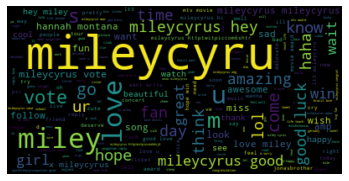

In [129]:
stringMileyCyrys=(" ").join(mileycyrusCorpusSL)
wordcloudMileyCyrys = WordCloud().generate(stringMileyCyrys)
plt.imshow(wordcloudMileyCyrys, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top palabras tommcfly

In [130]:
dftommcfly=pd.read_csv('tommcflyCorpusSL_Matrix.csv', header=0)

In [131]:
stommcfly = dftommcfly.sum()
stommcfly

Unnamed: 0    0.000000
stay          3.509705
foodhaha      0.333333
test          0.176097
asap          0.149733
                ...   
becoz         0.090909
window        0.100000
3s            0.066667
duda          0.500000
vary          0.062500
Length: 4372, dtype: float64

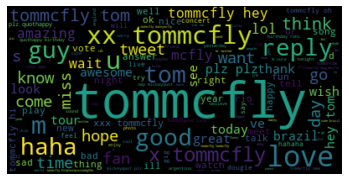

In [132]:
stringtommcfly=(" ").join(tommcflyCorpusSL)
wordcloudtommcfly = WordCloud().generate(stringtommcfly)
plt.imshow(wordcloudtommcfly, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top palabras ddlovato

In [133]:
dfddlovato=pd.read_csv('ddlovatoCorpusSL_Matrix.csv', header=0)

In [134]:
sddlovato = dfddlovato.sum()
sddlovato

Unnamed: 0         0.000000
rewind             0.083333
stay               0.928243
stamford           0.111111
test               0.182540
                     ...   
window             0.090909
sushi              0.111111
congratulations    0.366667
stalker            0.090909
rodanthe           1.217832
Length: 4502, dtype: float64

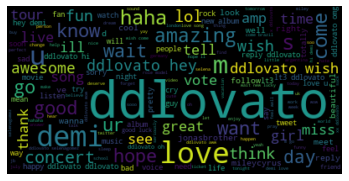

In [135]:
stringddlovato=(" ").join(ddlovatoCorpusSL)
wordcloudddlovato = WordCloud().generate(stringddlovato)
plt.imshow(wordcloudddlovato, interpolation='bilinear')
plt.axis("off")
plt.show()